# **Proyecto Final:**
# _Fundamentos de IA y Machine Learning_
## Descripción
El proyecto engloba el recorrido realizado por los tres sprints del módulo. Se pretende realizar una modelo predictivo basado en la regresión para calcular el precio de una vivienda función de las distintas variables del dataset, eligiendo el modelo que mejor se adapte según las métricas analizadas. Se deben realizar, al menos, 3 escenarios hipotéticos para poder compararlos y señalar el escenario más optimo.

Para el proyecto, utilizaremos el siguiente dataset público que encontramos en [Kaggle](https://www.kaggle.com/shree1992/housedata).

**Fases del proyecto:** 

- `Fase 1:` Importación del dataset
- `Fase 2:` Análisis exploratorio de los datos
- `Fase 3:` Fase de entrenamiento
- `Fase 4:` Evaluación y análisis de los resultados

- `_Fase adicional (optativa):_` Investigar las diferentes cloud vistas durante la clase 3 e importar el proyecto en uno de los cloud.

## FASE 1: Importar el Dataset
Importar el dataset desde kaggle.

In [ ]:
# Importar el dataset House price prediction
from google.colab import files
!pip install -q kaggle

In [ ]:
#Subir kaggle.json -> Se genera en Account como un API
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Descargar el fichero de Kaggle
!kaggle datasets download -d shree1992/housedata

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Mover fichero
!mv kaggle.json /root/.kaggle/kaggle.json

In [ ]:
# Volver a cargar datasete
!kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 29.6MB/s]


In [ ]:
# Descomprimir DS
!unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


## FASE 2: Análisis exploratorio de los datos
Análisis de los datos del dataset `Housedata`, específicamente el archivo _data.csv_.

### Exploración

In [ ]:
# Librería o Módulo para manejo de archivos
import pandas as pd 

In [ ]:
# Asignar los datos del dataset a variable
ds_house = pd.read_csv('data.csv')

In [ ]:
# Explorar las primeras líneas del dataset
ds_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Consultar datos estadísticos generales
ds_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [ ]:
# Consultar número de filas y columnas
ds_house.shape

(4600, 18)

In [ ]:
# Consultar si existen celdas sin valor
ds_house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
# Consultar nombres de columnas
ds_house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
ds_house.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
# Ver cuántos países hay en el dataset
pd.unique(ds_house['country'])

array(['2014-05-02 00:00:00', '2014-05-03 00:00:00',
       '2014-05-04 00:00:00', '2014-05-05 00:00:00',
       '2014-05-06 00:00:00', '2014-05-07 00:00:00',
       '2014-05-08 00:00:00', '2014-05-09 00:00:00',
       '2014-05-10 00:00:00', '2014-05-11 00:00:00',
       '2014-05-12 00:00:00', '2014-05-13 00:00:00',
       '2014-05-14 00:00:00', '2014-05-15 00:00:00',
       '2014-05-16 00:00:00', '2014-05-17 00:00:00',
       '2014-05-18 00:00:00', '2014-05-19 00:00:00',
       '2014-05-20 00:00:00', '2014-05-21 00:00:00',
       '2014-05-22 00:00:00', '2014-05-23 00:00:00',
       '2014-05-24 00:00:00', '2014-05-25 00:00:00',
       '2014-05-26 00:00:00', '2014-05-27 00:00:00',
       '2014-05-28 00:00:00', '2014-05-29 00:00:00',
       '2014-05-30 00:00:00', '2014-05-31 00:00:00',
       '2014-06-01 00:00:00', '2014-06-02 00:00:00',
       '2014-06-03 00:00:00', '2014-06-04 00:00:00',
       '2014-06-05 00:00:00', '2014-06-06 00:00:00',
       '2014-06-07 00:00:00', '2014-06-08 00:0

### Resumen
- Se observa que el `dataset` contiene 18 columnas y 4600 filas o registros.
- Se observa que no existen valores nulos o pérdidos en el dataset
- Se observa que solo hay información del país USA.
- Se observa que son datos entre Mayo y Julio del 2014. 
- Las columnas que se visualizaon son:
  - date:              object -> Fecha de registro
  - price:            float64 -> Precio
  - bedrooms:         float64 -> # Cuartos
  - bathrooms:        float64 -> # Baños
  - sqft_living:        int64 -> Metros2 construídos
  - sqft_lot:           int64 -> Metros2 lote
  - floors:           float64 -> # Pisos 
  - waterfront:         int64 -> # Frente al mar
  - view:               int64 -> # Vista
  - condition:          int64 -> Condición
  - sqft_above:         int64 -> Metros2 techo 
  - sqft_basement:      int64 -> Metros2 sótano 
  - yr_built:           int64 -> Años construída
  - yr_renovated:       int64 -> Años renovada
  - street:            object -> Calle
  - city:              object -> Ciudad
  - statezip:          object -> Código postal
  - country:           object -> País

### Visualización

In [ ]:
# Importar librerías y paquetes
import matplotlib.pyplot as plp
import seaborn as sns

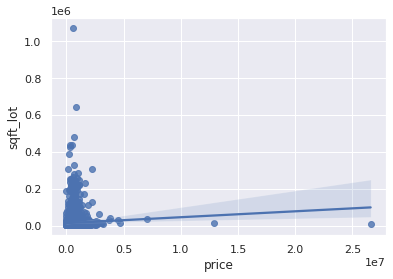

In [ ]:
# Visualización de metros construídos y lote
sns.set(style="darkgrid")
sns.regplot(x=ds_house['price'], y=ds_house['sqft_lot'])

### Resumen
- Se visualiza la relación entre precio y metros del lote. 

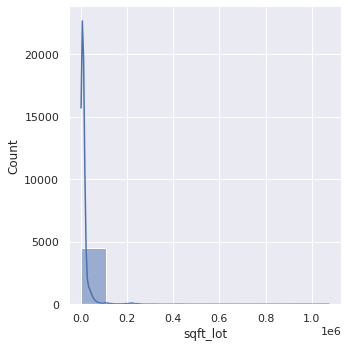

In [ ]:
# Vsualización displot
sns.displot(ds_house['sqft_lot'],bins=10,kde=True)

Resumen
Se visualiza la relación de metros del lote, entre cantidad y valor.

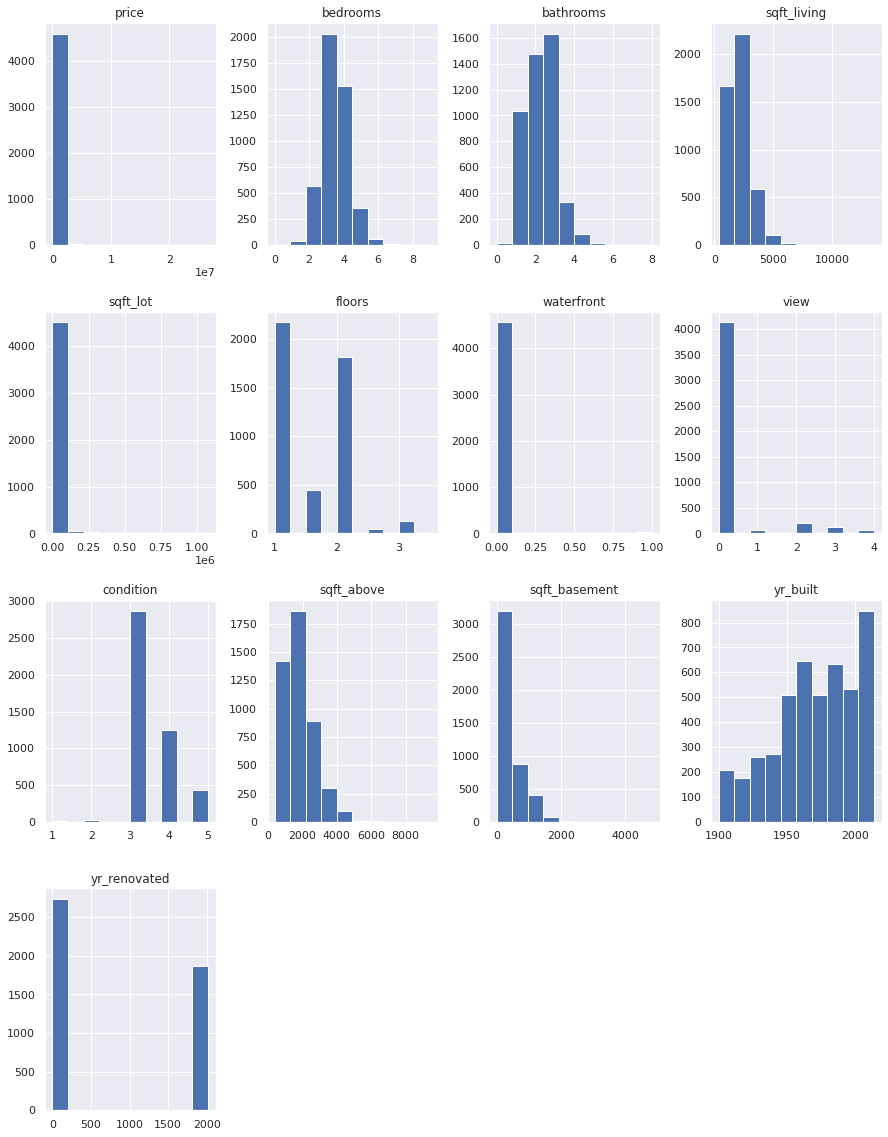

In [ ]:
# Visualización histogramas
ds_house.hist(figsize=(15,20))
plp.show()

### Resumen:
- Se observa que a partir del año 2000, hubo más construcciones.
- Existen mas casas de 2 cuartos

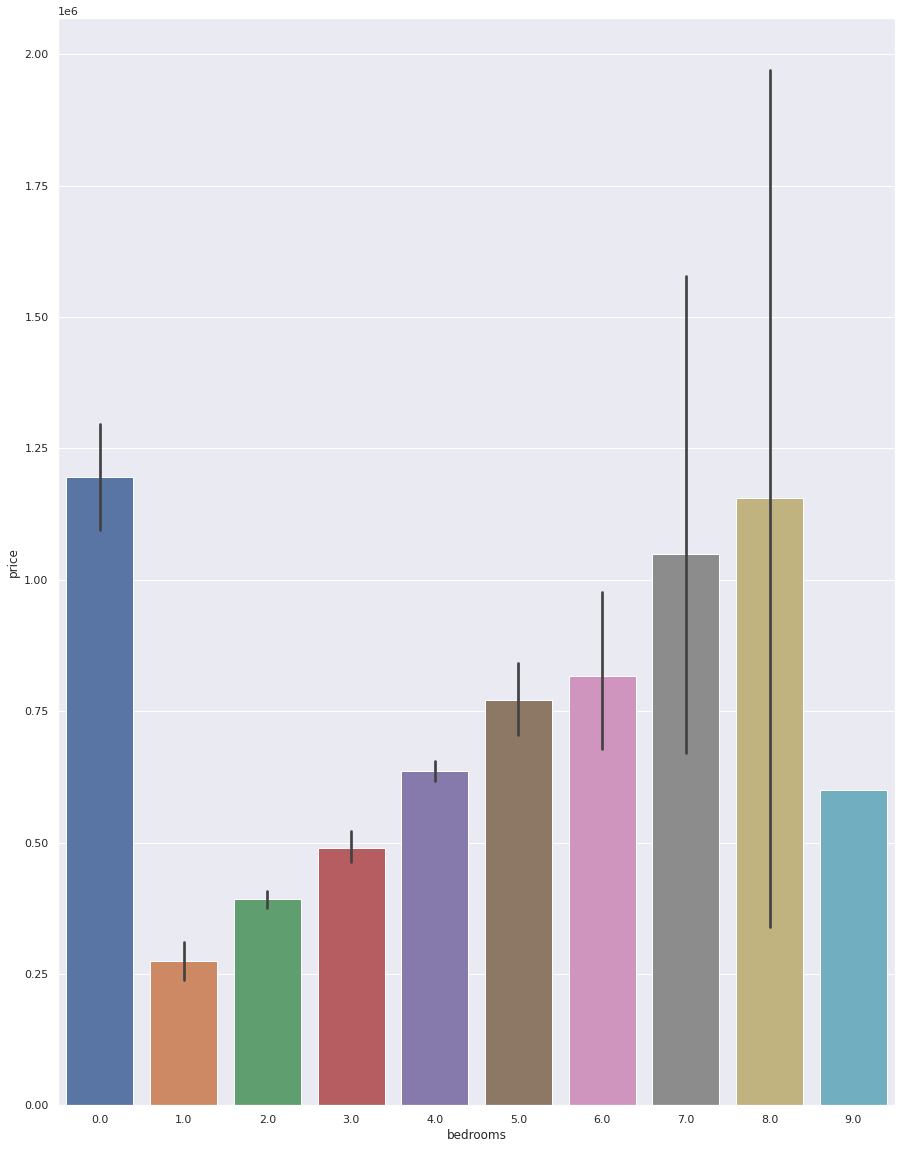

In [ ]:
# Visualización barras horizontal
plp.figure(figsize=(15,20))
sns.barplot(data=ds_house,y='price',x='bedrooms',orient="v1")

### Resumen:
- Se observa que los lotes son mas costosos, igual que las casas con 8 cuartos.

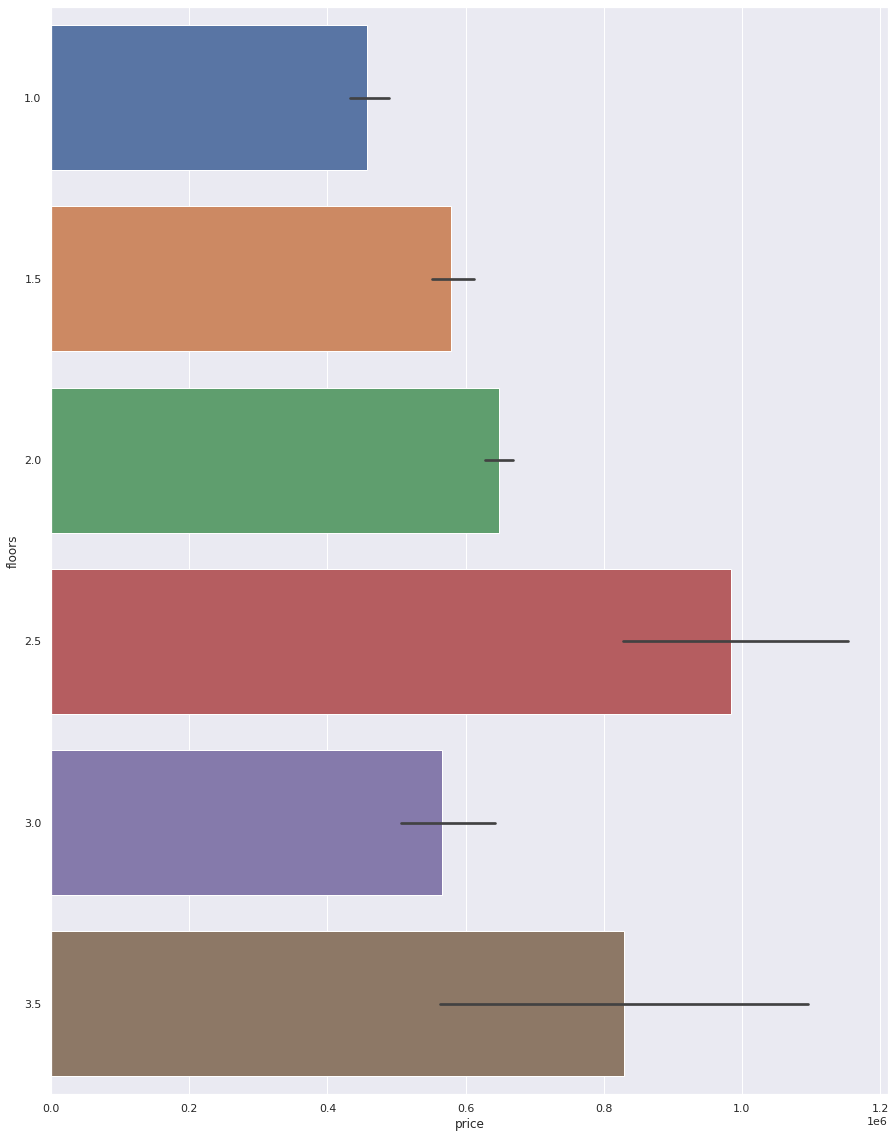

In [ ]:
# Visualización barras vertical
plp.figure(figsize=(15,20))
sns.barplot(data=ds_house,y='floors',x='price',orient="h5")

### Resumen:
- Se observa que las casas con 2.5 o 3.5 pisos son mas costosas.
- las casas mas económicas son las de 1 piso.

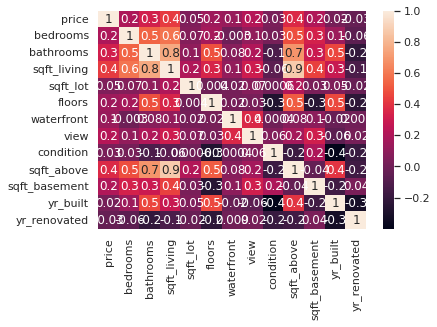

In [ ]:
# Correlación de variables
corr = ds_house.corr()
sns.heatmap(corr,annot=True,square=False, fmt=".0001g")

### Resumen:
- Se observa que las casas con 2.5 o 3.5 pisos son mas costosas.
- las casas mas económicas son las de 1 piso.

## Fase 3: Entrenamiento
Entrenamiento de los datos del dataset `ds_house`

### Hipótesis 1:
Eliminar las variables para tomar solo las de tipo numérico, es decir, eliminar las categóricas.

In [ ]:
# Preparar dataset de H1
# Borrar columnas categóricas
cols_cate = ["date","street","city","statezip","country"]
ds_h1 = ds_house.drop(cols_cate,axis=1)

# Mostrar nuevo dataset
ds_h1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
# Consultar datos estadísticos generales
ds_h1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [ ]:
# Visualizar los datos de cada columna, baños
pd.unique(ds_house['bathrooms'])

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 0.  , 6.75])

In [ ]:
# Variables independientes
x_h1 = ds_h1.drop('price',axis=1)
# Variables dependientes
y_h1 = ds_h1['price']

In [ ]:
# Importar librería para entrenar
from sklearn.model_selection import train_test_split
x_h1_train,x_h1_test,y_h1_train,y_h1_test = train_test_split(x_h1,y_h1,test_size=0.20,random_state=43) 

In [ ]:
# Regresion Líneal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_h1_train,y_h1_train)

LinearRegression()

In [ ]:
from numpy.core.fromnumeric import mean
# Importar el cálculo de error cuadrático
from sklearn.metrics import mean_squared_error

# Predecir valores y datos usados en entrenamiento
pred_train = regresion_lineal.predict(x_h1_train)

# Calcular error cuadrático medio
mse_h1_train = mean_squared_error(y_true=y_h1_train,y_pred=pred_train)
print("Error Cuadrático Medio="+str(mse_h1_train))

# Predecir valores y datos
pred_test = regresion_lineal.predict(x_h1_test)

# Calcular error cuadrático medio
mse_h1_test = mean_squared_error(y_true=y_h1_test,y_pred=pred_test)
print("Error Cuadrático Medio="+str(mse_h1_test))

Error Cuadrático Medio=292440342188.2669
Error Cuadrático Medio=74834240426.81778


#### Resumen:
- Se observa que el error cuadrático es muy alto, después de entrenar el modelo sin las variables categóricas.

### Hipótesis 2:
Transformar las variables `float` a `int`, eliminar los puntos medios.

In [ ]:
# Preparar dataset de H2
ds_h1.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

In [ ]:
# Transformar columnas float = ["price","bedrooms","bathrooms","floors"]
ds_h2 = ds_h1
ds_h2 = ds_h2.astype(int)

# Mostrar nuevo dataset
ds_h2.dtypes

price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
dtype: object

In [ ]:
# Describe los datos de forma estadística
ds_h2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.0,4.00,9.0
bathrooms,4600.0,1.788913,0.752185,0.0,1.00,2.0,2.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.0,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,1.459130,0.552194,1.0,1.00,1.0,2.00,3.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.0,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.0,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.0,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.0,2300.00,9410.0


In [ ]:
# Variables independientes
x_h2 = ds_h2.drop('price',axis=1)
# Variables dependientes
y_h2 = ds_h2['price']

In [ ]:
# Importar librería para entrenar
from sklearn.model_selection import train_test_split
x_h2_train,x_h2_test,y_h2_train,y_h2_test = train_test_split(x_h2,y_h2,test_size=0.20,random_state=43) 

In [ ]:
# Regresion Líneal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(x_h2_train,y_h2_train)

LinearRegression()

In [ ]:
from numpy.core.fromnumeric import mean
# Importar el cálculo de error cuadrático
from sklearn.metrics import mean_squared_error

# Predecir valores y datos usados en entrenamiento
pred_train = regresion_lineal.predict(x_h2_train)

# Calcular error cuadrático medio
mse_h2_train = mean_squared_error(y_true=y_h2_train,y_pred=pred_train)
print("Error Cuadrático Medio="+str(mse_h2_train))

# Predecir valores y datos
pred_test = regresion_lineal.predict(x_h2_test)

# Calcular error cuadrático medio
mse_h2_test = mean_squared_error(y_true=y_h2_test,y_pred=pred_test)
print("Error Cuadrático Medio="+str(mse_h2_test))

Error Cuadrático Medio=292362393825.29297
Error Cuadrático Medio=75194221896.11882


#### Resumen:
- Se observa que el error cuadrático es muy alto, después de entrenar el modelo cambiando las variables flotantes a enteras.

### Hipótesis 3:
Normalizar la variable objetivo `price`.

In [ ]:
# Preparar el dataset de H3 sin indicar las columnas, ya que previamente se han filtrado
ds_h3 = pd.get_dummies(data = ds_h2,prefix='OHE',prefix_sep='_',drop_first=True,dtype='int8')

# Visualizar el dataset
ds_h3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992


In [ ]:
# Describe los datos de forma estadística
ds_h3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.0,4.00,9.0
bathrooms,4600.0,1.788913,0.752185,0.0,1.00,2.0,2.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.0,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,1.459130,0.552194,1.0,1.00,1.0,2.00,3.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.0,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.0,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.0,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.0,2300.00,9410.0


In [ ]:
# Variables independientes
x_h3 = ds_h3.drop('price',axis=1)
# Variables dependientes
y_h3 = ds_h3['price']

In [ ]:
# Escalar variable price para estandarizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Transformar numpy convierte la serie en array y luego reshape -1,1 pasa a matriz nx1
y_h3 = scaler.fit_transform(y_h3.to_numpy().reshape(-1,1))
# Transformar variable en un array 1xn
y_h3 = y_h3.reshape(1,-1)[0]

In [ ]:
#Entrenar
x_h3_train,x_h3_test,y_h3_train,y_h3_test = train_test_split(x_h3,y_h3,test_size=0.20,random_state=43) 

In [ ]:
# Regresion Líneal
from sklearn.linear_model import LinearRegression
regresion_lineal_3=LinearRegression()
regresion_lineal_3.fit(x_h3_train,y_h3_train)

LinearRegression()

In [ ]:
# predecir valores y datos usados en entrenamiento
pred_train_3 = regresion_lineal_3.predict(x_h3_train)

# calcular error cuadrático medio
mse_h3_train = mean_squared_error(y_true=y_h3_train,y_pred=pred_train_3)
print("Error Cuadrático Medio="+str(mse_h3_train))

# predecir valores y datos
pred_test_3 = regresion_lineal_3.predict(x_h3_test)

# calcular error cuadrático medio
mse_h3_test = mean_squared_error(y_true=y_h3_test,y_pred=pred_test_3)
print("Error Cuadrático Medio="+str(mse_h3_test))

Error Cuadrático Medio=0.9198400646593591
Error Cuadrático Medio=0.2365785045948176


#### Resumen:
- Se observa que el error cuadrático baja cuando se normaliza la variable objetivo.

In [ ]:
ds_h3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979
4596,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009
4597,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0
4598,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0


## Fase 4: Evaluación y Análisis de los resultados
- Después de realizar las 3 hipótesis sobre el dataset `ds_house`, correspondiente a información de precios de casas de acuerdo a las características de estas. Se observa que se aproxima a 0 el error medio cuadrático cuando se normaliza la variable objetivo en escala estándar.

- Con respecto a los datos, se observa que al limitar los tipos de datos de las columnas, clasificar estas, de tal manera que se seleccionen las más representativas, ayuda a evaluar la población y definir que datos son importantes para predecir según lo esperado.

## Fase Opcional (Optativa)
_Actividad Adicional:_
Con respecto a publicar o generar el notebook en la nube (azure, GCP, aws) no lo pude realizar, ya que son versiones que necesitan ingresar tarjetas de crédito o formas de pago al registrarse, sin embargo, lo publiqué en mi repositorio de [GitHub](https://github.com/davidhurtadop/myRepository/blob/master/Proyecto_Final_Fundamentos_IA_y_Machine_Learning.ipynb)